In [7]:
from sklearn.linear_model import LinearRegression

X = [[10], [20], [30], [40], [50]]
y = [15, 25, 35, 45, 60]

model = LinearRegression()
model.fit(X, y)

print("coef_:", model.coef_[0])
print("intercept_:", model.intercept_)

prediction = model.predict([[60]])
print("Prediction for 60:", prediction[0])


coef_: 1.1
intercept_: 3.0
Prediction for 60: 69.0


In [8]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(mse)

1.9999999999999942


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = [[1], [2], [3], [4], [5], [6], [7], [8]]
y = [1.5, 3.5, 2.0, 4.0, 5.0, 7.5, 7.0, 9.0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse  = mean_squared_error(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Train MSE: 0.33095238095238083
Test MSE: 4.373979591836747


In [11]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

models = {
    "Ridge(alpha=0.1)": Ridge(alpha=0.1),
    "Ridge(alpha=10)": Ridge(alpha=10)
}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print(f"{name}:")
    print(f"  Train MSE = {train_mse:.4f}")
    print(f"  Test  MSE = {test_mse:.4f}")
    print()


Ridge(alpha=0.1):
  Train MSE = 0.3180
  Test  MSE = 2.2176

Ridge(alpha=10):
  Train MSE = 0.6727
  Test  MSE = 1.8196



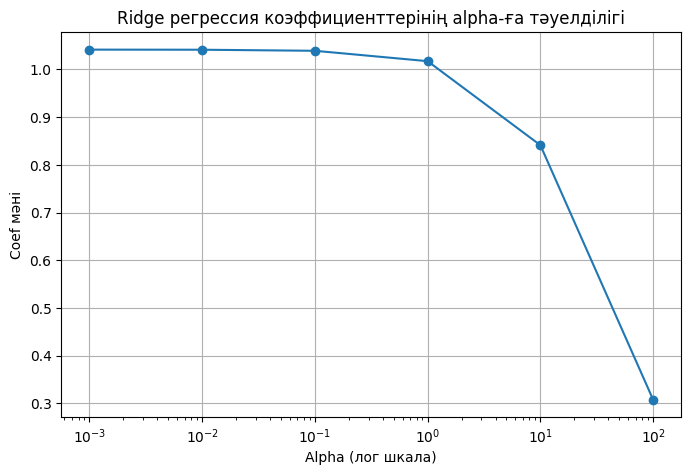

In [13]:
import matplotlib.pyplot as plt
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

coefs = []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_[0])   # бір өлшемді X, сондықтан тек бір coef

# График
plt.figure(figsize=(8,5))
plt.plot(alphas, coefs, marker='o')
plt.xscale("log")
plt.xlabel("Alpha (лог шкала)")
plt.ylabel("Coef мәні")
plt.title("Ridge регрессия коэффициенттерінің alpha-ға тәуелділігі")
plt.grid(True)
plt.show()